In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms_all = []
stepsLO_all = []
stepsRI_all = []
stepsRand_all = []

for i in range(1, 6):
    print(f"Step: {i} ----------------------------->>>>>\n\n")
    terms, stepsLO = gen_filtered_lambda_terms(
        count_terms=LAMBDA_TERM_COUNT,
        down_vertices_limit=DOWNLIMIT,
        up_vertices_limit=UPLIMIT,
    )

    countVertices = list(map(lambda term: term.verticesNumber, terms))
    countRedexes = list(map(lambda term: len(term.redexes), terms))

    print(f"number of lambda terms {len(terms)}")
    print("number of vertices= {}".format(countVertices))
    print("number of redexes= {}".format(countRedexes))

    print("number of steps to normalize using LO strategy= {}".format(stepsLO))
    print(f"number of terms with normal form {len(terms)}")

    print("number of steps to normalize using LO strategy= {}".format(stepsLO))

    stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
    print("number of steps to normalize using RI strategy= {}".format(stepsRI))

    stepsRand = [
        sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    print("number of steps to normalize using Random strategy= {}".format(stepsRand))

    terms_all.append(terms)
    stepsLO_all.append(stepsLO)
    stepsRI_all.append(stepsRI)
    stepsRand_all.append(stepsRand)

Step: 1 ----------------------------->>>>>


Generated terms: 235
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [55, 54, 56, 51, 59, 53, 55, 58, 57, 59, 52, 51, 54, 55, 59, 56, 59, 55, 51, 51, 54, 54, 51, 53, 56, 53, 56, 51, 54, 56, 53, 54, 58, 52, 51, 53, 59, 56, 53, 57, 59, 54, 55, 54, 54, 57, 59, 52, 54, 57, 56, 57, 54, 52, 51, 51, 54, 56, 56, 57, 59, 52, 51, 57, 52, 53, 51, 51, 58, 58, 54, 53, 51, 57, 54, 53, 54, 59, 54, 59, 55, 54, 53, 53, 51, 53, 51, 52, 51, 58, 57, 58, 56, 55, 52, 51, 52, 54, 59, 57]
number of redexes= [7, 5, 3, 3, 6, 5, 6, 3, 7, 4, 8, 3, 10, 3, 9, 6, 8, 6, 5, 5, 3, 7, 6, 5, 6, 6, 6, 6, 5, 5, 4, 3, 9, 7, 6, 8, 5, 9, 10, 5, 9, 5, 9, 7, 7, 8, 7, 5, 6, 5, 6, 6, 8, 4, 3, 3, 11, 6, 5, 4, 6, 6, 3, 8, 3, 6, 5, 7, 3, 5, 5, 5, 4, 6, 5, 7, 6, 8, 7, 7, 10, 3, 9, 7, 7, 8, 6, 3, 2, 6, 5, 10, 6, 3, 5, 6, 5, 7, 4, 7]
number of steps to normalize using LO strategy= [22, 2, 11, 8, 3, 9, 6, 29, 2, 1, 10, 1

In [3]:
for stepsLO in stepsLO_all:
    print("max cound LO: {}".format(max(stepsLO)))

for stepsRI in stepsRI_all:
    print("max cound RI: {}".format(max(stepsRI)))

for stepsRand in stepsRand_all:
    print("max cound Rand: {}".format(max(stepsRand)))

max cound LO: 40
max cound LO: 61
max cound LO: 54
max cound LO: 86
max cound LO: 102
max cound RI: inf
max cound RI: inf
max cound RI: inf
max cound RI: 31
max cound RI: inf
max cound Rand: inf
max cound Rand: inf
max cound Rand: inf
max cound Rand: 63.6
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 200
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [5]:
lambda_env_all = [
    LambdaEnv(
        strategies=strategies_env,
        lambda_terms=terms_all[i],
        max_step_term=max_count_steps_rlenv,
        count_terms=LAMBDA_TERM_COUNT,
    )
    for i in range(5)
]

In [6]:
rew_eg_all = []
for lambda_env in lambda_env_all:
    _, rewards_e_greedy = run_e_greedy_policy(
        lambda_env,
        exploration=explore_actions,
        max_term_reward=max_count_steps_rlenv,
        epsilon=epsilon,
        deterministic=True,
        is_action_based=True,
    )
    rew_eg_all.append(rewards_e_greedy)

In [7]:
rew_eg_non_all = []
for lambda_env in lambda_env_all:
    lambda_env.reset_soft()
    lambda_env, rewards_e_greedy_non_d = run_e_greedy_policy(
        lambda_env,
        exploration=explore_actions,
        max_term_reward=max_count_steps_rlenv,
        epsilon=epsilon,
        deterministic=False,
        is_action_based=True,
    )
    rew_eg_non_all.append(rewards_e_greedy_non_d)

In [8]:
steps_eg_all = []
for rewards_e_greedy in rew_eg_all:
    steps_e_greedy = [max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy]
    steps_eg_all.append(steps_e_greedy)

steps_eg_non_all = []
for rewards_e_greedy_non_d in rew_eg_non_all:
    steps_e_greedy_non_d = [
        max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy_non_d
    ]
    steps_eg_non_all.append(steps_e_greedy_non_d)

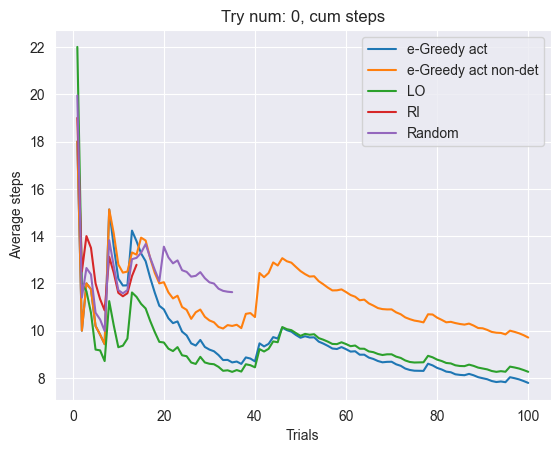

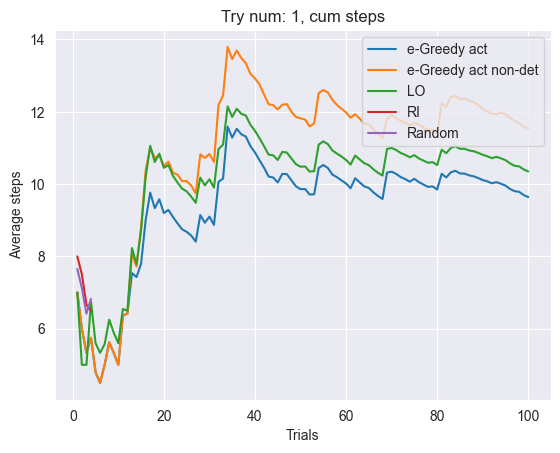

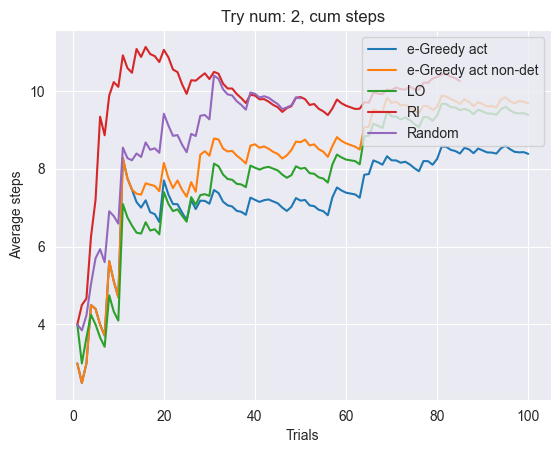

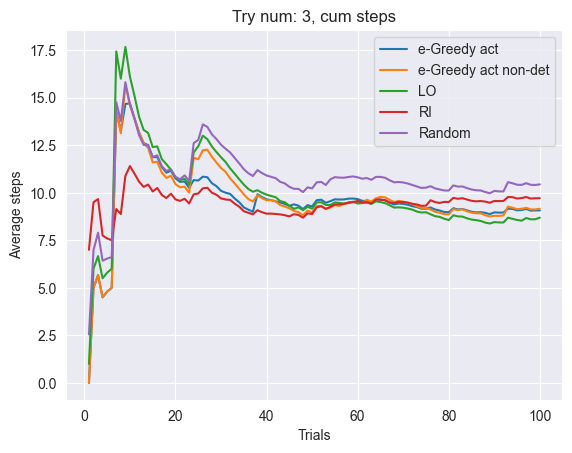

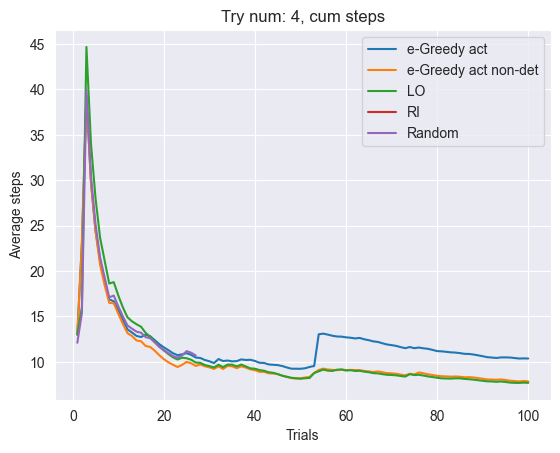

In [10]:
for i in range(5):
    comp_data = {
        "e-Greedy act": (steps_eg_all[i], "-"),
        "e-Greedy act non-det": (steps_eg_non_all[i], "-"),
        "LO": (stepsLO_all[i], "-"),
        "RI": (stepsRI_all[i], "-"),
        "Random": (stepsRand_all[i], "-"),
    }

    draw_cumulative_avg_comparison(comp_data, title=f"Try num: {i}, cum steps")

### Without outliers

In [14]:
from scipy.stats import iqr


def get_outliers(x, axis=0, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]


def clear_arr(arr):
    return np.array(arr)[get_outliers(np.array(arr))]

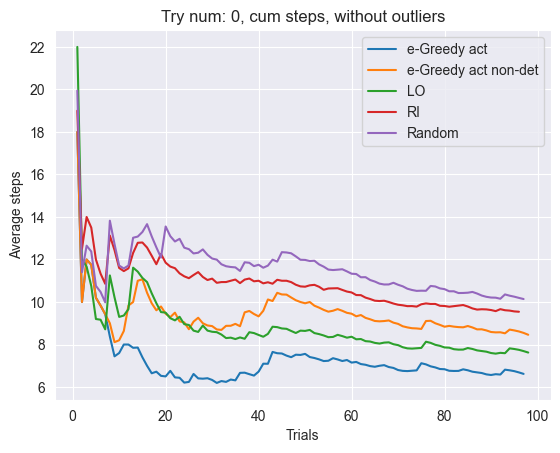

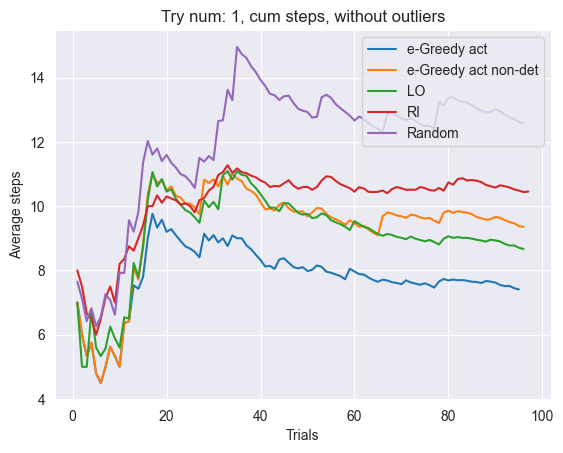

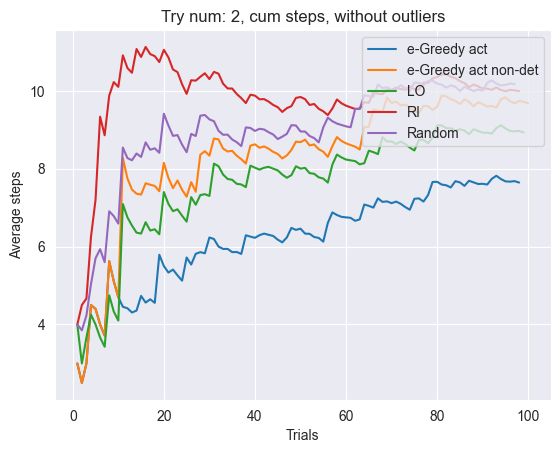

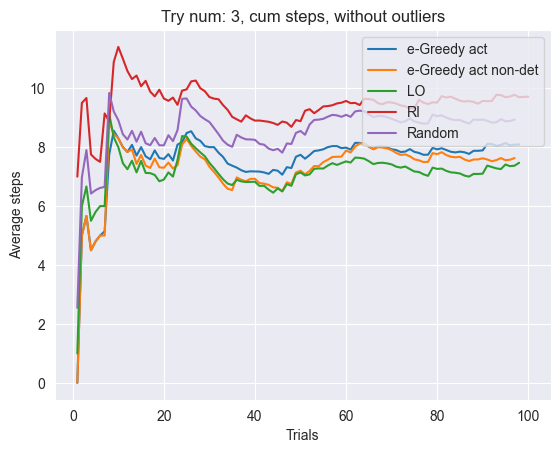

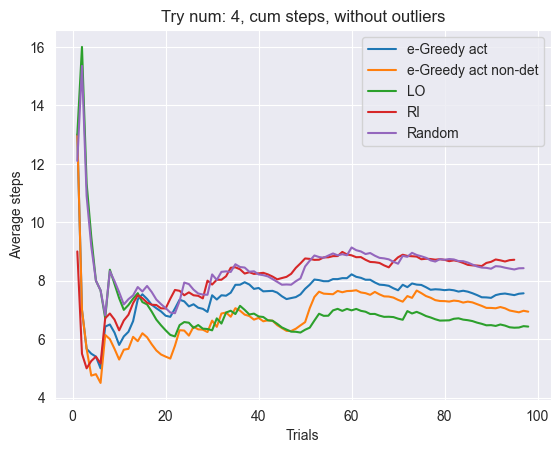

In [16]:
for i in range(5):
    comp_data = {
        "e-Greedy act": (clear_arr(steps_eg_all[i]), "-"),
        "e-Greedy act non-det": (clear_arr(steps_eg_non_all[i]), "-"),
        "LO": (clear_arr(stepsLO_all[i]), "-"),
        "RI": (clear_arr(stepsRI_all[i]), "-"),
        "Random": (clear_arr(stepsRand_all[i]), "-"),
    }

    draw_cumulative_avg_comparison(
        comp_data, title=f"Try num: {i}, cum steps, without outliers"
    )